In [1]:
import tensorflow as tf
import yaml
from pathlib import Path
from vanilla_gan import GAN
from data_gen import generate_sin_data, sample_data
import matplotlib.pyplot as plt

config = yaml.load(Path("config.yaml").read_text(), Loader=yaml.SafeLoader)

In [2]:
real_samples = sample_data(1000)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Generator loss: 

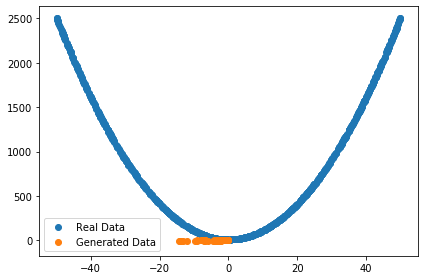

Generator loss: 0.6937085390090942
Discriminator loss: 0.6972131729125977


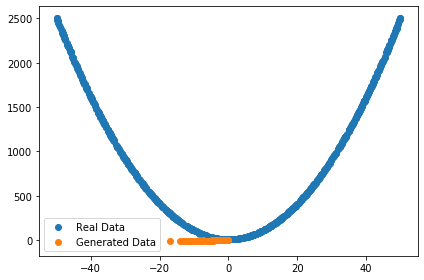

Generator loss: 0.9225596189498901
Discriminator loss: 0.5034568309783936


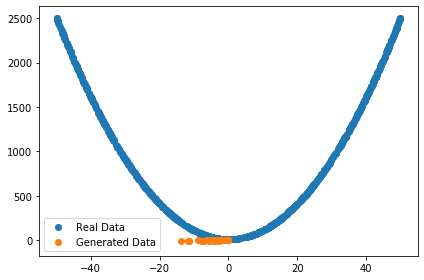

Generator loss: 0.8980676531791687
Discriminator loss: 0.5503929853439331


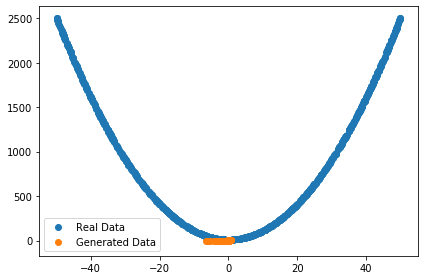

Generator loss: 0.8840667009353638
Discriminator loss: 0.5807695984840393


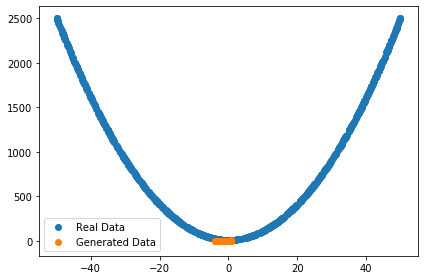

Generator loss: 0.90557861328125
Discriminator loss: 0.5787572860717773


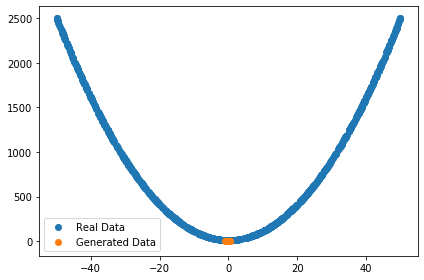

Generator loss: 0.9687998294830322
Discriminator loss: 0.5572881102561951


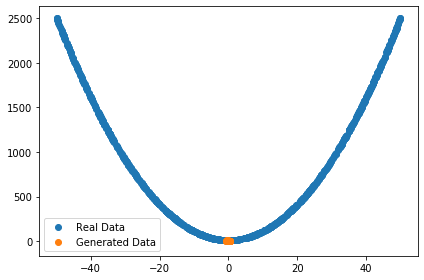

Generator loss: 1.0497468709945679
Discriminator loss: 0.46644169092178345


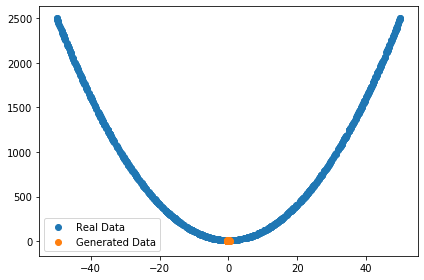

Generator loss: 1.147642731666565
Discriminator loss: 0.5802773833274841


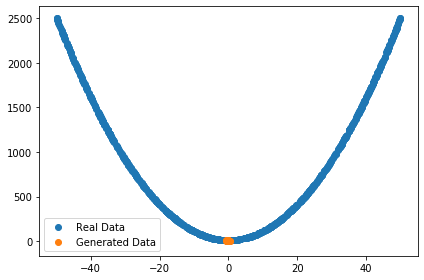

Generator loss: 1.2014316320419312
Discriminator loss: 0.5167717933654785


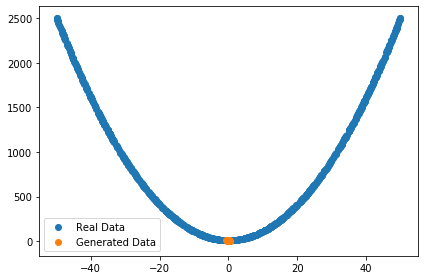

Generator loss: 1.23591148853302
Discriminator loss: 0.4631962180137634


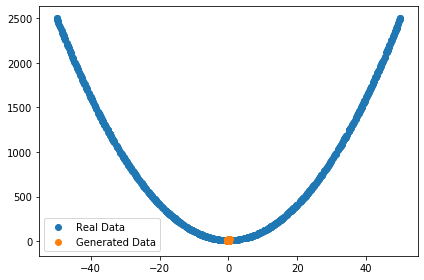

Generator loss: 1.3178778886795044
Discriminator loss: 0.4876317083835602


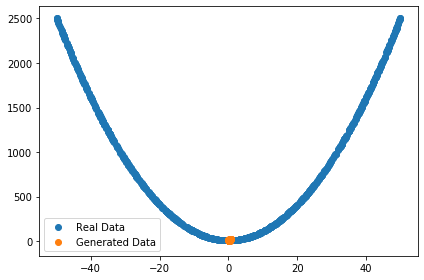

Generator loss: 1.3769996166229248
Discriminator loss: 0.4090625047683716


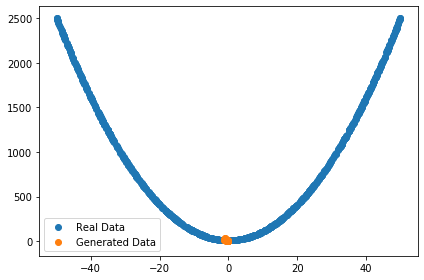

Generator loss: 1.432502031326294
Discriminator loss: 0.4541567265987396


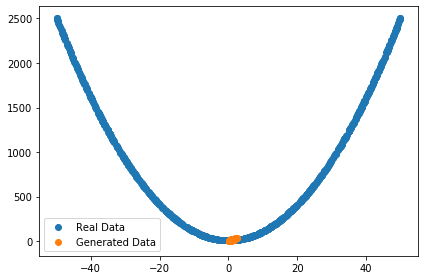

Generator loss: 1.576460361480713
Discriminator loss: 0.37273767590522766


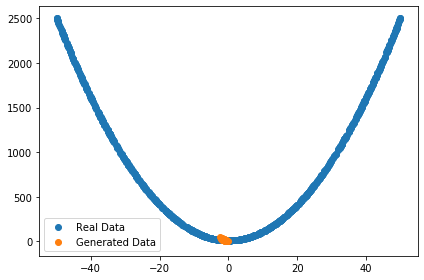

Generator loss: 1.5406179428100586
Discriminator loss: 0.449684202671051


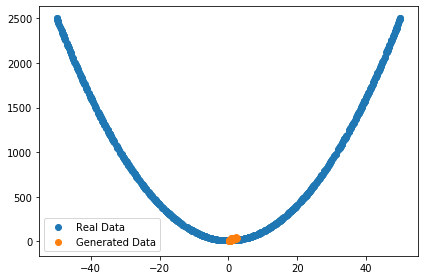

Generator loss: 1.5693516731262207
Discriminator loss: 0.4866267442703247


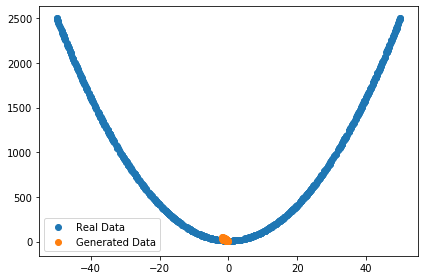

Generator loss: 1.6803336143493652
Discriminator loss: 0.3624911904335022


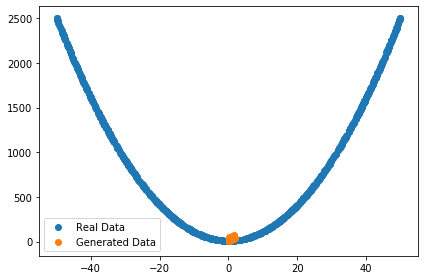

Generator loss: 1.7602605819702148
Discriminator loss: 0.6044669151306152


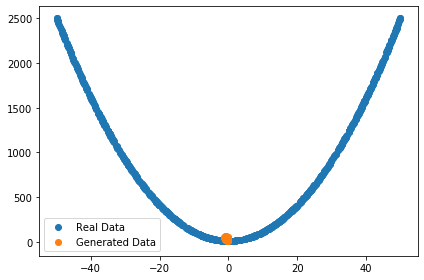

Generator loss: 1.57390558719635
Discriminator loss: 0.5749415159225464


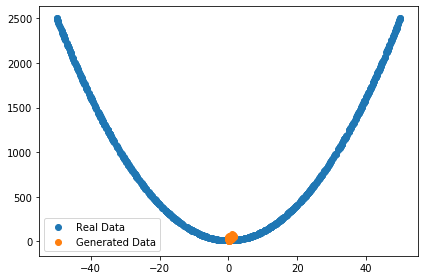

Generator loss: 1.5701268911361694
Discriminator loss: 0.6920089721679688


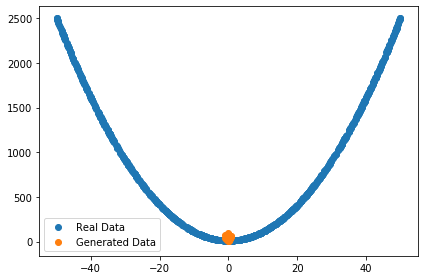

Generator loss: 1.5050702095031738
Discriminator loss: 0.7519819736480713


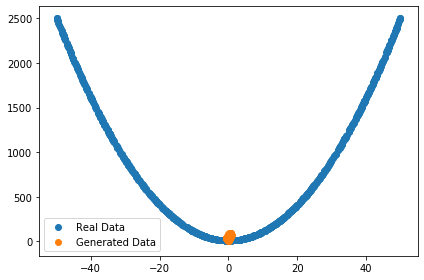

Generator loss: 1.5017812252044678
Discriminator loss: 0.6698530912399292


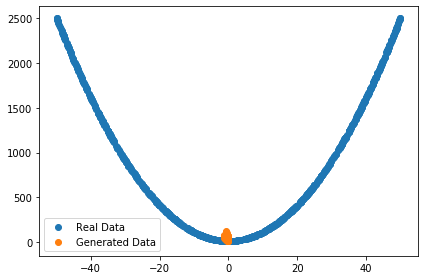

Generator loss: 1.4437086582183838
Discriminator loss: 0.5223721265792847


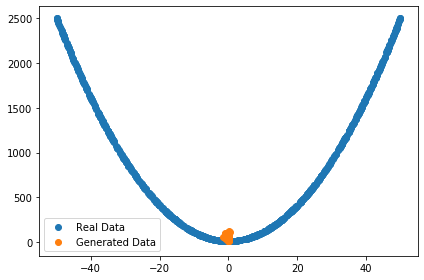

Generator loss: 1.7474308013916016
Discriminator loss: 0.8639312982559204


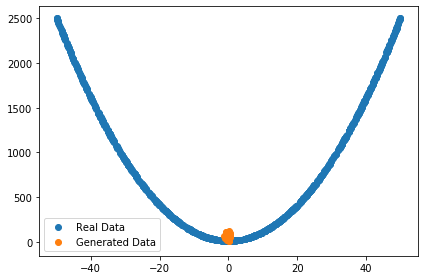

In [3]:
# Set up loss object and functions.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


def discriminator_loss(actual_output, generated_output):
    real_loss = cross_entropy(tf.ones_like(actual_output), actual_output)
    generated_loss = cross_entropy(tf.zeros_like(generated_output), generated_output)
    total_loss = real_loss + generated_loss
    return total_loss


def generator_loss(generated_output):
    return cross_entropy(tf.ones_like(generated_output), generated_output)


def train(model, config):
    EPOCHS = 2500
    batch_size = config["vanilla-gan"]["batch_size"]
    for epoch in range(EPOCHS):
        data = sample_data(batch_size)
        generator_loss_, discriminator_loss_ = model(data)

        if epoch % 100 == 0:
            print(f"Generator loss: {generator_loss_}")
            print(f"Discriminator loss: {discriminator_loss_}")
            generated_samples = model.generate_sample()
            
            plt.figure()
            xax = plt.scatter(real_samples[:,0], real_samples[:,1])
            gax = plt.scatter(generated_samples[:,0],generated_samples[:,1])

            plt.legend((xax,gax), ("Real Data","Generated Data"))
            plt.tight_layout()
            plt.show()
            plt.close()


def main(config):
    model = GAN(config)
    train(model, config)

main(config)